In [1]:
# modules we'll use
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()


# read in all our data
survey = pd.read_csv("Data/2020_Data_Professional_Salary_Survey_Responses.csv")

# set seed for reproducibility
np.random.seed(0) 

# Select Data from CSV
df = pd.DataFrame(survey[['SurveyYear','Timestamp','SalaryUSD','Country','PostalCode',
                                 'YearsWithThisDatabase','JobTitle','ManageStaff','YearsWithThisTypeOfJob',
                                 'HowManyCompanies','OtherPeopleOnYourTeam','Gender','Counter']])
df.head()



,SurveyYear,Timestamp,SalaryUSD,Country,PostalCode,YearsWithThisDatabase,JobTitle,ManageStaff,YearsWithThisTypeOfJob,HowManyCompanies,OtherPeopleOnYourTeam,Gender,Counter
0,2020,1/4/2020 18:50:34,115000,United States,3,15,DBA (Production Focus - build & troubleshoot s...,No,5,1 (this is the only company where I've had thi...,2,Male,1
1,2020,1/4/2020 10:43:01,100000,United States,NaN,6,"Developer: App code (C#, JS, etc)",No,6,1 (this is the only company where I've had thi...,More than 5,Male,1
2,2020,1/4/2020 9:51:45,100000,Spain,28046,2,Other,Yes,3,1 (this is the only company where I've had thi...,1,Male,1
3,2020,1/4/2020 1:08:53,70000,United States,94133,3,Analyst,No,3,1 (this is the only company where I've had thi...,2,Male,1
4,2020,1/3/2020 15:28:54,110000,United States,95354,30,DBA (General - splits time evenly between writ...,No,25,3,None,Male,1


In [2]:
# Drop Duplicates
df.drop_duplicates()

,SurveyYear,Timestamp,SalaryUSD,Country,PostalCode,YearsWithThisDatabase,JobTitle,ManageStaff,YearsWithThisTypeOfJob,HowManyCompanies,OtherPeopleOnYourTeam,Gender,Counter
0,2020,1/4/2020 18:50:34,115000,United States,3,15,DBA (Production Focus - build & troubleshoot s...,No,5,1 (this is the only company where I've had thi...,2,Male,1
1,2020,1/4/2020 10:43:01,100000,United States,NaN,6,"Developer: App code (C#, JS, etc)",No,6,1 (this is the only company where I've had thi...,More than 5,Male,1
2,2020,1/4/2020 9:51:45,100000,Spain,28046,2,Other,Yes,3,1 (this is the only company where I've had thi...,1,Male,1
3,2020,1/4/2020 1:08:53,70000,United States,94133,3,Analyst,No,3,1 (this is the only company where I've had thi...,2,Male,1
4,2020,1/3/2020 15:28:54,110000,United States,95354,30,DBA (General - splits time evenly between writ...,No,25,3,None,Male,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8622,2017,1/5/2017 5:34:33,35000,France,Not Asked,10,DBA,No,10,Not Asked,None,Not Asked,1
8623,2017,1/5/2017 5:33:03,56000,United Kingdom,Not Asked,6,DBA,No,2,Not Asked,None,Not Asked,1
8624,2017,1/5/2017 5:32:57,95000,Germany,Not Asked,5,Other,Yes,25,Not Asked,2,Not Asked,1
8625,2017,1/5/2017 5:26:23,61515,United Kingdom,Not Asked,15,DBA,No,3,Not Asked,1,Not Asked,1


In [3]:
# #Replace - value to 0 in SalaryUSD
df['SalaryUSD'] = df['SalaryUSD'].replace([' -   '],'0')
df.loc[df.SalaryUSD == "0"]


,SurveyYear,Timestamp,SalaryUSD,Country,PostalCode,YearsWithThisDatabase,JobTitle,ManageStaff,YearsWithThisTypeOfJob,HowManyCompanies,OtherPeopleOnYourTeam,Gender,Counter
1062,2020,12/11/2019 19:37:00,0,United States,49546,4,Analyst,No,4,1 (this is the only company where I've had thi...,None,Female,1
2549,2019,12/11/2018 9:09:55,0,Canada,NaN,5,"Developer: App code (C#, JS, etc)",No,5,1 (this is the only company where I've had thi...,None,Male,1
3037,2018,12/27/2017 4:31:29,0,Canada,NaN,5,"Developer: App code (C#, JS, etc)",No,6,Not Asked,None,Male,1


In [4]:
# Convert String to number for SalaryUSD
df['SalaryUSD'] = pd.to_numeric(df['SalaryUSD'])
df.SalaryUSD.dtypes


dtype('int64')

In [5]:
La feuille excel avec les statistiques. C'est dans le drive, semaine 6
[2:56 PM]
j'y placerai également les versions finales des notebook de cleaning et de visualisation# Slice text to get a Number from HowManyCompanies Column
df['HowManyCompanies'] = df['HowManyCompanies'].str.slice(stop=1)
# df.HowManyCompanies.unique()

# Replace N to 0
df['HowManyCompanies'] = df['HowManyCompanies'].replace(['N'],'0')
df['HowManyCompanies'] = pd.to_numeric((df['HowManyCompanies']))
df.HowManyCompanies.unique()

array([1, 3, 2, 4, 6, 5, 0])

In [6]:
# Slice text to get a Number from OtherPeopleOnYourTeam Column
df['OtherPeopleOnYourTeam'] = df['OtherPeopleOnYourTeam'].str.slice(start=-1)


# Replace e,i to 0
df['OtherPeopleOnYourTeam'] = df['OtherPeopleOnYourTeam'].replace(['e','i'],'0')
df['OtherPeopleOnYourTeam'] = pd.to_numeric((df['OtherPeopleOnYourTeam']))
df.OtherPeopleOnYourTeam.unique()

array([2, 5, 1, 0, 3, 4])

In [7]:
#Convert to Date
df['Timestamp'] = pd.to_datetime(df['Timestamp']).dt.normalize()
df.Timestamp.head()



0   2020-01-04
1   2020-01-04
2   2020-01-04
3   2020-01-04
4   2020-01-03
Name: Timestamp, dtype: datetime64[ns]

In [8]:
# Replace Gender
df['Gender'] = df['Gender'].replace(['Non-binary/third gender', 'Prefer not to say','mosquito ', 'I am Batman', 'human  This is also my race.','Database Administrator', 'Always On Cluster', 'Attack helicopter','Lizzard', 'Dalek', 'Pastafarian', 'Apache Helicopter', 'Dragon','There are only two genders for people, either male or female. I am a male.','Meat Popsicle ', 'Attack Helicopter','This question is inappropriate. ', 'Cyborg', 'Vulcan','Grayson Perry','Attackhelicopter with rabbitears and afro-icelandic teeth','Attack Helicopter (M)', 'Muppet', 'Any human one','Attack Helicopter. (serious dude, gender questions?)','Reptilian', 'confused', 'toad frog', 'Alien', 'Not Asked'],'Others')
df.Gender.unique()

array(['Male', 'Female', 'Others'], dtype=object)

In [24]:
us_dream = df.loc[(df.Country == 'United States')]
us_dream




,SurveyYear,Timestamp,SalaryUSD,Country,PostalCode,YearsWithThisDatabase,JobTitle,ManageStaff,YearsWithThisTypeOfJob,HowManyCompanies,OtherPeopleOnYourTeam,Gender,Counter
0,2020,2020-01-04,115000,United States,3,15,DBA (Production Focus - build & troubleshoot s...,No,5,1,2,Male,1
1,2020,2020-01-04,100000,United States,NaN,6,"Developer: App code (C#, JS, etc)",No,6,1,5,Male,1
3,2020,2020-01-04,70000,United States,94133,3,Analyst,No,3,1,2,Male,1
4,2020,2020-01-03,110000,United States,95354,30,DBA (General - splits time evenly between writ...,No,25,3,0,Male,1
5,2020,2020-01-03,79500,United States,78727,2,Analyst,No,2,1,0,Male,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8609,2017,2017-01-05,66000,United States,Not Asked,10,"Developer: App code (C#, JS, etc)",No,10,0,0,Others,1
8611,2017,2017-01-05,96000,United States,Not Asked,5,DBA,No,5,0,0,Others,1
8612,2017,2017-01-05,85000,United States,Not Asked,8,DBA,No,2,0,0,Others,1
8614,2017,2017-01-05,137500,United States,Not Asked,16,DBA,No,6,0,4,Others,1


In [10]:
#export to CSV
us_dream.to_csv(r'/home/apprennant/TheAmericanDream/db01.csv', index = False)

<AxesSubplot:xlabel='JobTitle'>

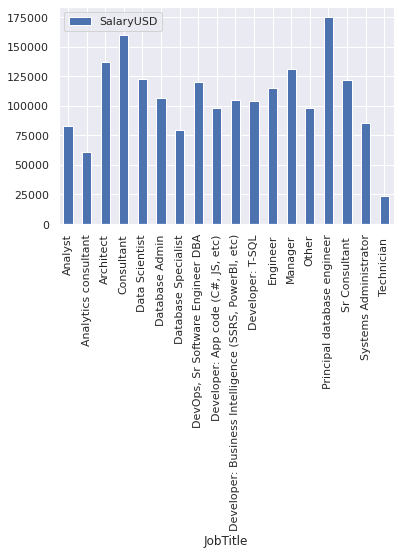

In [11]:
job_title = pd.DataFrame(us_dream[['JobTitle','SalaryUSD']])
# print(avg_job_title)
# avg_job_title = job_title.groupby('JobTitle').sum()
mean_job_title = job_title.groupby('JobTitle').mean()


# mean_job_title.plot(kind="line")
mean_job_title.plot(kind="bar")




Text(0, 0.5, 'Job Title')

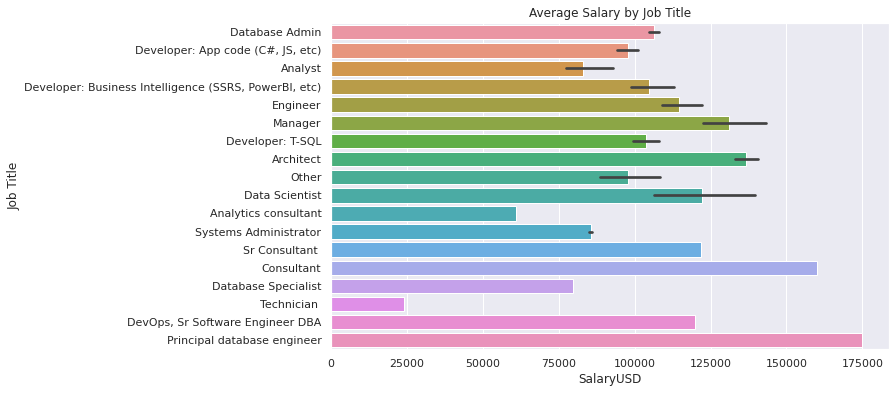

In [12]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Average Salary by Job Title")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=job_title['SalaryUSD'], y=job_title['JobTitle'])

# Add label for vertical axis
plt.ylabel("Job Title")


Text(0.5, 1.0, 'Distribution by jobs')

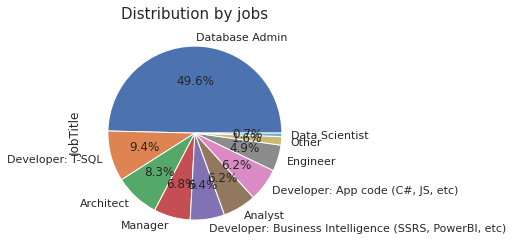

In [23]:
#Create Pie Chart by Counting a job Title
count_job_title = job_title.groupby('JobTitle')['JobTitle'].count()
count_job_title.sort_values(inplace=True, ascending=False)
# count_job_title.head(5)
# labels = count_job_title["JobTitle"].value_counts().index
# values = count_job_title["JobTitle"].value_counts()

count_job_title.head(10).plot.pie(autopct="%.1f%%")

plt.title("Distribution by jobs", fontsize=15)


In [14]:
df_by_year = pd.DataFrame(us_dream[['SurveyYear','JobTitle','SalaryUSD']])
avg_salary_by_year = df_by_year.groupby(['SurveyYear','JobTitle']).mean()

avg_salary_by_year


SalaryUSD
SurveyYear JobTitle                                                         
2017       Analyst                                              94890.835294
           Analytics consultant                                 61000.000000
           Architect                                           133673.894737
           Consultant                                          160000.000000
           Data Scientist                                      137388.111111
           Database Admin                                      103484.147541
           Database Specialist                                  79750.000000
           DevOps, Sr Software Engineer DBA                    120000.000000
           Developer: App code (C#, JS, etc)                    94578.557522
           Developer: Business Intelligence (SSRS, PowerBI...   94852.184466
           Developer: T-SQL                                    100787.976331
           Engineer                                            113533.245098
           Manager                                             128269.603604
           Other                                               102768.548387
           Principal database engineer                         175000.000000
           Sr Consultant                                       122000.000000
           Systems Administrator                                85500.000000
           Technician                                           24000.000000
2018       Analyst                                              80454.752212
           Architect                                           132752.822785
           Data Scientist                                      102222.222222
           Database Admin                                      106704.385614
           Developer: App code (C#, JS, etc)                    95109.384106
           Developer: Business Intelligence (SSRS, PowerBI...  115306.204724
           Developer: T-SQL                                    102935.800000
           Engineer                                            120246.941860
           Manager                                             123205.620915
           Other                                               100299.760000
2019       Analyst                                              75910.204082
           Architect                                           133305.740000
           Data Scientist                                      112375.000000
           Database Admin                                      108145.323129
           Developer: App code (C#, JS, etc)                   104600.700000
           Developer: Business Intelligence (SSRS, PowerBI...  102754.895833
           Developer: T-SQL                                    106157.475410
           Engineer                                            104888.809524
           Manager                                             125141.666667
           Other                                                82222.222222
2020       Analyst                                              79217.523810
           Architect                                           150992.425532
           Data Scientist                                      127706.666667
           Database Admin                                      109653.661142
           Developer: App code (C#, JS, etc)                   107763.678571
           Developer: Business Intelligence (SSRS, PowerBI...  102500.285714
           Developer: T-SQL                                    108657.673469
           Engineer                                            112117.985075
           Manager                                             151496.294118
           Other                                                95117.625000

In [15]:
gender_compare = pd.DataFrame(us_dream[['JobTitle','Gender','SalaryUSD']])
gender_compare

,JobTitle,Gender,SalaryUSD
0,Database Admin,Male,115000
1,"Developer: App code (C#, JS, etc)",Male,100000
3,Analyst,Male,70000
4,Database Admin,Male,110000
5,Analyst,Male,79500
...,...,...,...
8609,"Developer: App code (C#, JS, etc)",Others,66000
8611,Database Admin,Others,96000
8612,Database Admin,Others,85000
8614,Database Admin,Others,137500


Text(0, 0.5, 'USD')

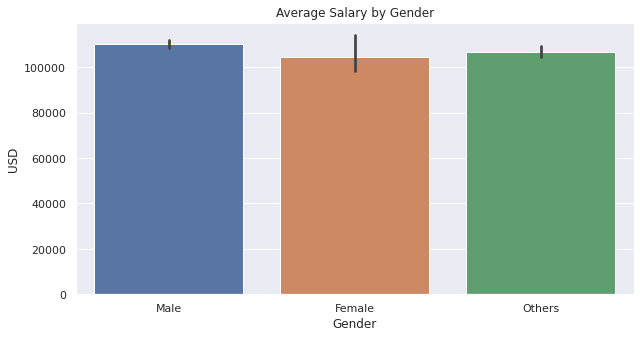

In [16]:
# Set the width and height of the figure
plt.figure(figsize=(10,5))

# Add title
plt.title("Average Salary by Gender")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=gender_compare['Gender'], y=gender_compare['SalaryUSD'])

# Add label for vertical axis
plt.ylabel("USD")

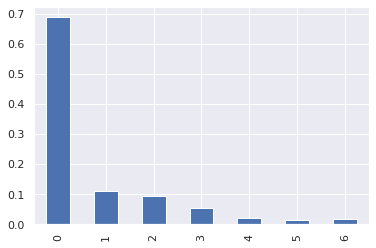

In [30]:
tot_company = us_dream['HowManyCompanies'].value_counts(normalize=True).sort_index(ascending=True)
# tot_company1.loc[(tot_company["HowManyCompanies"] == 0)
tot_company.plot(kind='bar')
plt.show()